##**Brain Tumor Prediction**

**Importing Libraries**

In [217]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')

**Data Preprocesing**

In [2]:
ruta_casos_positivos = '/content/drive/MyDrive/Positivo'
ruta_casos_negativos = '/content/drive/MyDrive/Negativo'

In [3]:
import cv2
import numpy as np

def cargar_datos(ruta, etiqueta, nuevo_ancho, nuevo_alto):
    datos = []
    etiquetas = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".jpg"):
            imagen = cv2.imread(os.path.join(ruta, archivo))
            imagen = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))
            datos.append(imagen)
            etiquetas.append(etiqueta)
    return datos, etiquetas

nuevo_ancho = 100
nuevo_alto = 100

datos_positivos, etiquetas_positivas = cargar_datos(ruta_casos_positivos, etiqueta=1, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
datos_negativos, etiquetas_negativas = cargar_datos(ruta_casos_negativos, etiqueta=0, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)

datos = datos_positivos + datos_negativos
etiquetas = etiquetas_positivas + etiquetas_negativas

X = np.array(datos)
Y = np.array(etiquetas)

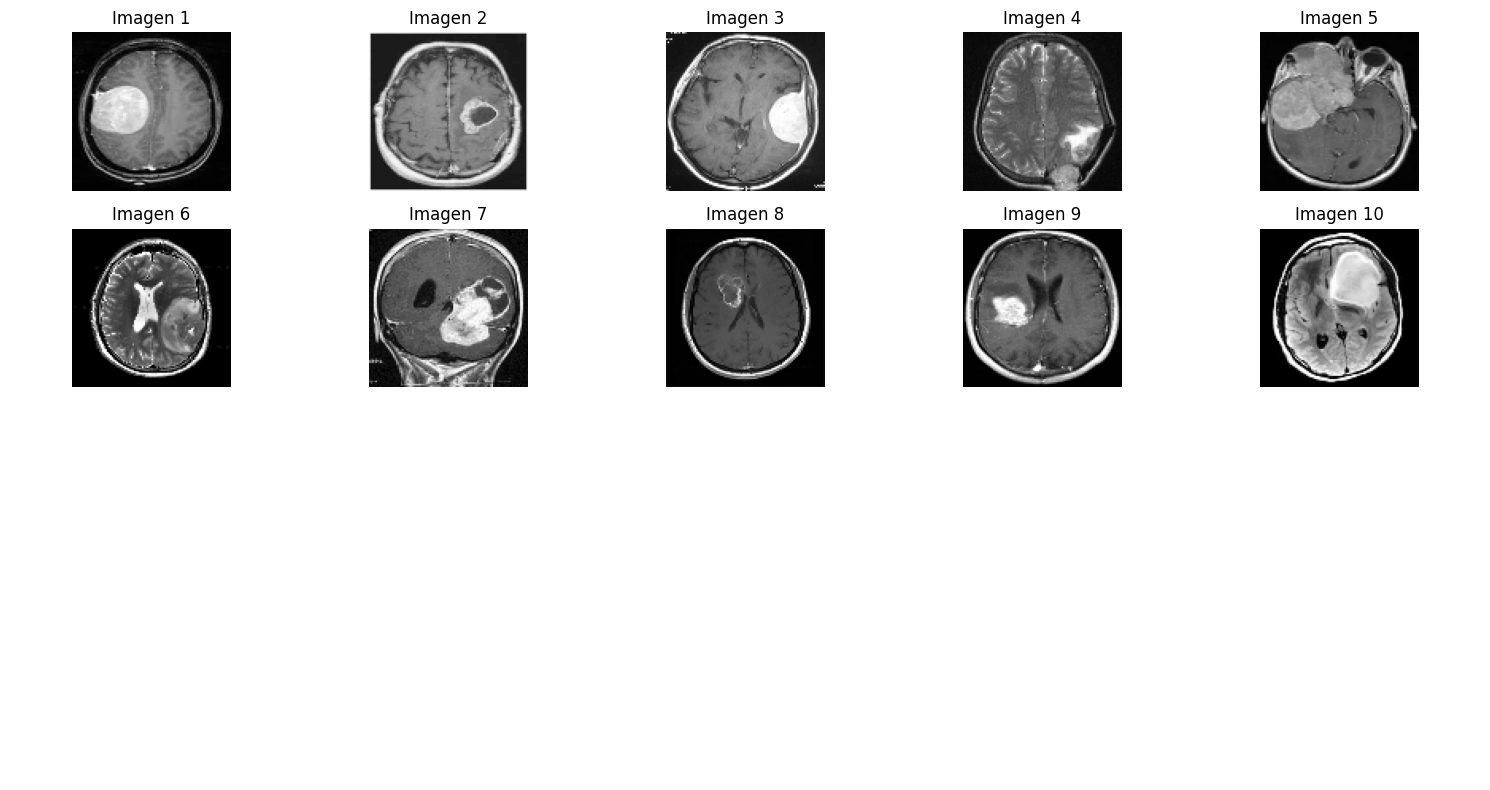

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 5, figsize=(15, 8))

for i in range(10):
    row = i // 5
    col = i % 5

    axs[row, col].imshow(X[i], cmap='gray')
    axs[row, col].set_title(f'Imagen {i+1}')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()

plt.show()

**Modeling and Evaluation**

In [223]:
X = np.array(datos)
X = X.reshape(X.shape[0], -1)
Y = etiquetas

**Scaler**

In [224]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**PCA**

In [225]:
num_componentes = 40
pca = PCA(n_components=num_componentes)
X_pca = pca.fit_transform(X_scaled)

**Train Test Split**

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

**Plot PCA**


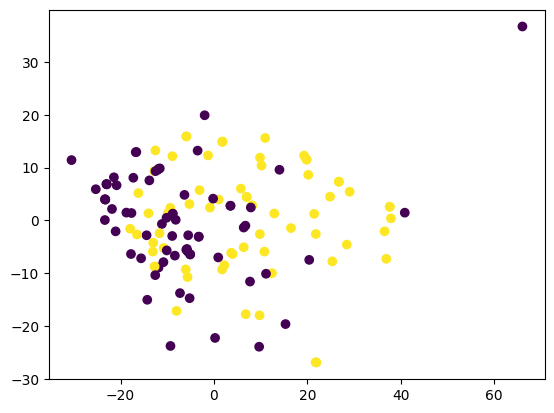

In [227]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')

**Logistic Regression**

In [112]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        17
           1       0.85      0.61      0.71        18

    accuracy                           0.74        35
   macro avg       0.76      0.75      0.74        35
weighted avg       0.77      0.74      0.74        35

accuracy:  0.7428571428571429
mean_absolute_error:  0.2571428571428571
mean_squared_error:  0.2571428571428571


**Random Forest Classifier**

In [113]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.85      0.94      0.89        18

    accuracy                           0.89        35
   macro avg       0.89      0.88      0.88        35
weighted avg       0.89      0.89      0.89        35

accuracy:  0.8857142857142857
mean_absolute_error:  0.11428571428571428
mean_squared_error:  0.11428571428571428


**Decision Tree**

In [114]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))


              precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.70      0.78      0.74        18

    accuracy                           0.71        35
   macro avg       0.72      0.71      0.71        35
weighted avg       0.72      0.71      0.71        35

accuracy:  0.7142857142857143
mean_absolute_error:  0.2857142857142857
mean_squared_error:  0.2857142857142857


**SVC**

In [67]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.80      0.67      0.73        18

    accuracy                           0.74        35
   macro avg       0.75      0.75      0.74        35
weighted avg       0.75      0.74      0.74        35

accuracy:  0.7428571428571429
mean_absolute_error:  0.2571428571428571
mean_squared_error:  0.2571428571428571


**KNeighborsClassifier**

In [68]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.86      0.67      0.75        18

    accuracy                           0.77        35
   macro avg       0.79      0.77      0.77        35
weighted avg       0.79      0.77      0.77        35

accuracy:  0.7714285714285715
mean_absolute_error:  0.22857142857142856
mean_squared_error:  0.22857142857142856


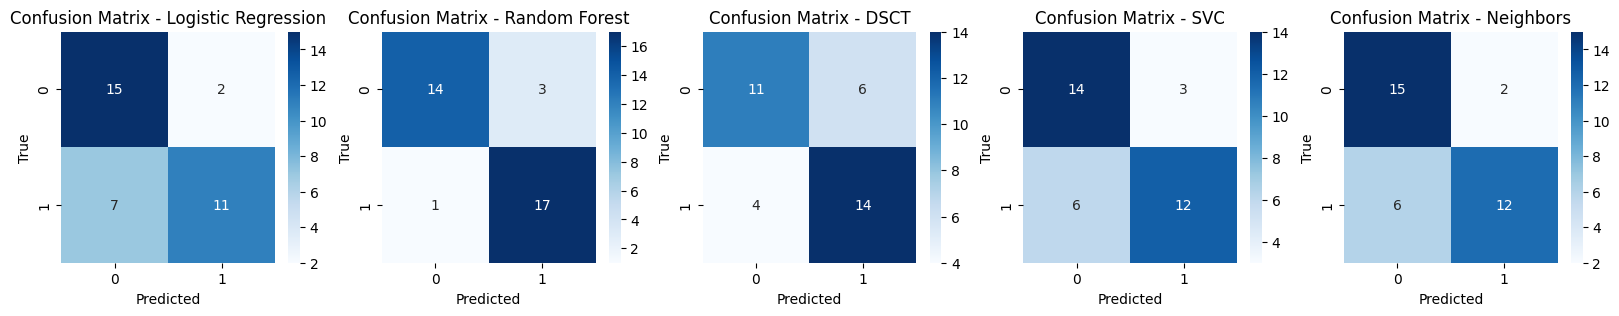

In [220]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

plt.show()

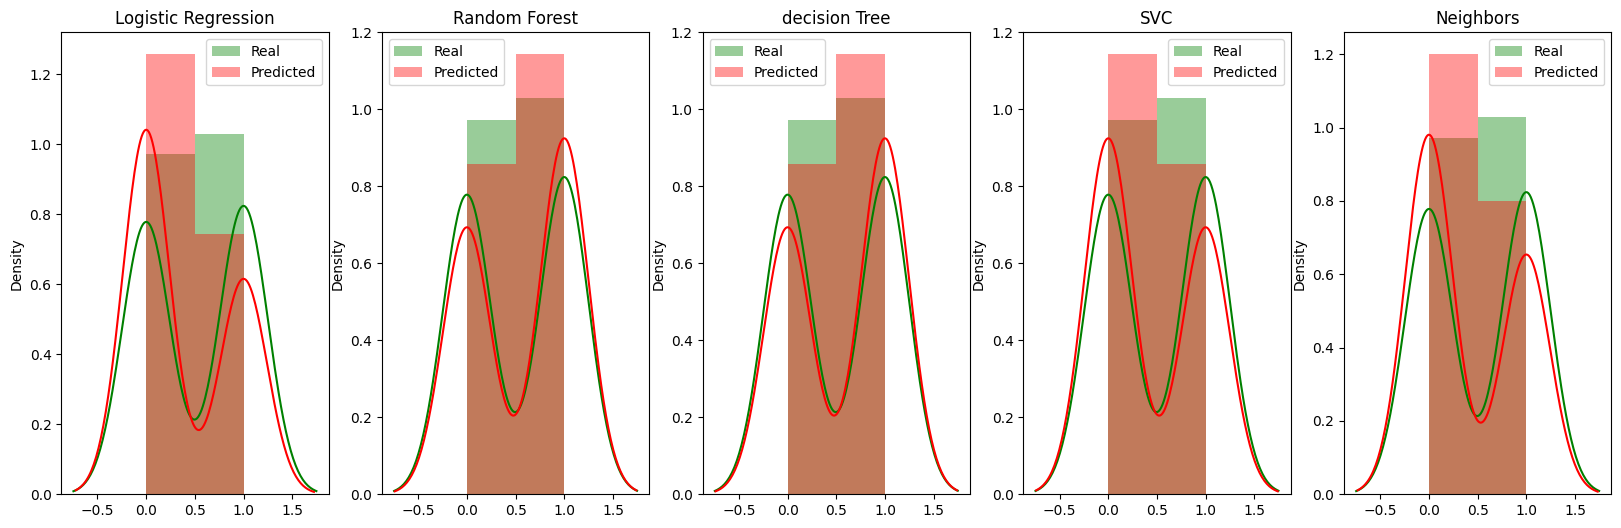

In [221]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()

**Evaluation**

In [204]:
X_val = np.array(datos[123:])
X_val = X_val.reshape(X_val.shape[0], -1)
scaler = MinMaxScaler()
X_val = scaler.fit_transform(X_val)
X_val.shape

num_componentes = 40
pca_2 = PCA(n_components=num_componentes)
X_pca_val = pca_2.fit_transform(X_val)

In [213]:
predictions=random_forest_model.predict(X_pca_val)
imagenes = datos[123:]

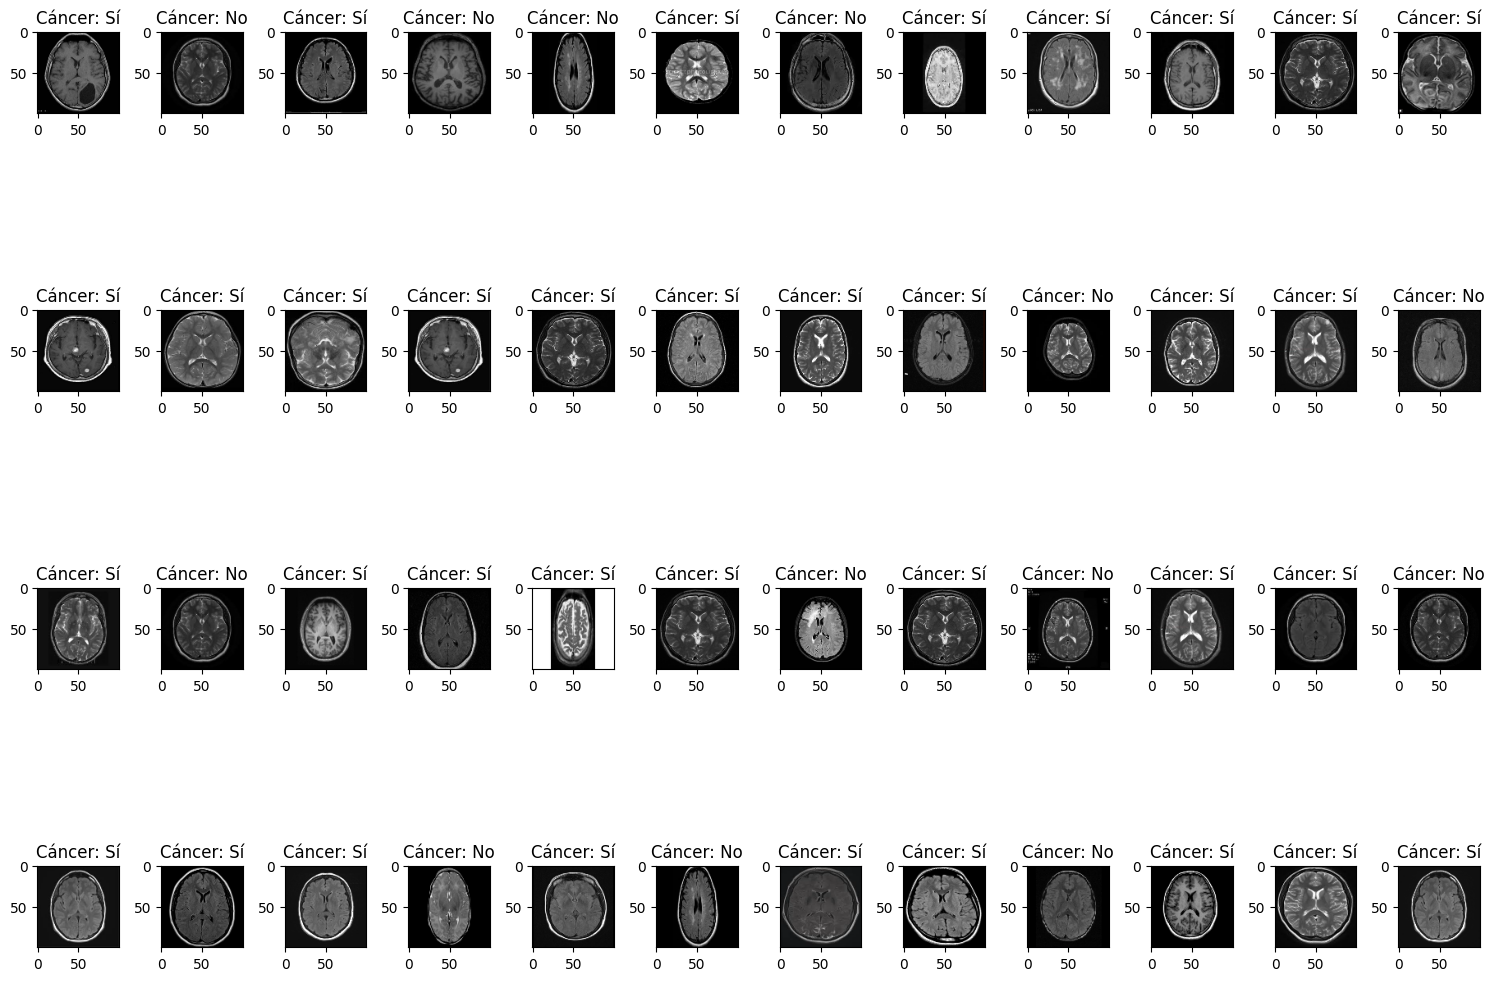

In [214]:
num_filas = 4
num_columnas = (len(imagenes) + num_filas - 1) // num_filas

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 12))


for i, (img, prediction) in enumerate(zip(imagenes, predictions)):
    fila = i // num_columnas
    columna = i % num_columnas

    if prediction == 1:
        result = "Cáncer: Sí"
    else:
        result = "Cáncer: No"

    axs[fila, columna].imshow(img)
    axs[fila, columna].set_title(f"{result}")

plt.tight_layout()
plt.show()